In [1]:
## stock data processing -> matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2013-10-20'
end = '2023-10-20'

stock = 'GOOG'

data = yf.download(stock, start, end)


[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-21,25.192074,25.379869,24.895435,24.988836,24.927618,145675990
2013-10-22,25.031178,25.230431,24.801786,25.080990,25.019547,88675135
2013-10-23,24.931549,25.772150,24.922335,25.688961,25.626028,106927293
2013-10-24,25.700418,25.917107,25.524328,25.543009,25.480433,83997668
2013-10-25,25.624453,25.624453,25.174141,25.285225,25.223282,81524432
...,...,...,...,...,...,...
2023-10-13,140.649994,141.339996,137.970001,138.580002,138.240509,19438700
2023-10-16,139.729996,140.904999,139.320007,140.490005,140.145844,17345600
2023-10-17,140.029999,141.250000,138.529007,140.990005,140.644608,17424000


In [5]:
# Calculate 100-day moving average
ma_100_days = data.Close.rolling(window=100).mean()

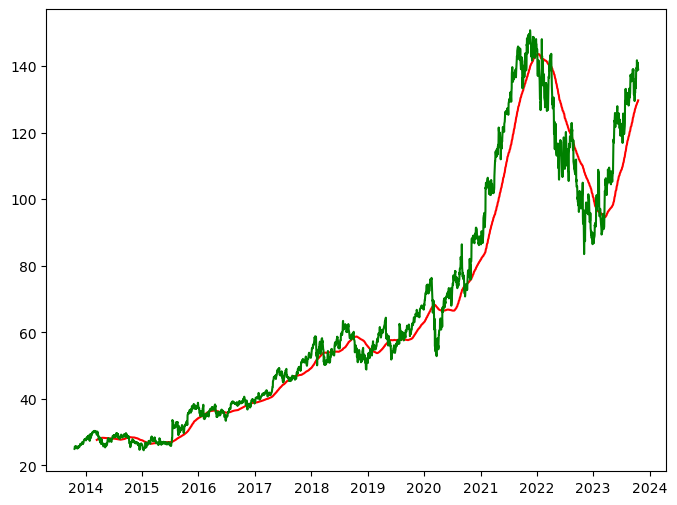

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label='100-day MA')
plt.plot(data.Close, 'g',  label='Close Price')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(100).mean()

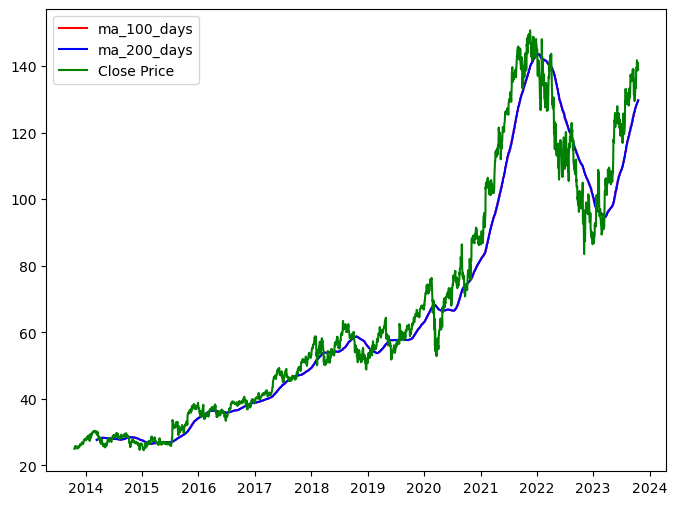

In [8]:

plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label='ma_100_days')
plt.plot(ma_200_days, 'b', label='ma_200_days')
plt.plot(data['Close'], 'g', label='Close Price')
plt.legend()
plt.show()

In [9]:
## training data

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2013

In [13]:
data_test.shape[0]

504

In [14]:
## MACHINE learning lets gooooo
## trainging model 
## by using neural network on basis of 10 days data

In [15]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale = scaler.fit_transform(data_train)

In [18]:
13,14,15,16,17,18,19,20,21,22

(13, 14, 15, 16, 17, 18, 19, 20, 21, 22)

In [19]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [20]:
##using keras lstm dropout dense layer


In [21]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [23]:
x,y = np.array(x), np.array(y)

In [24]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [25]:


# Create the Sequential model
model = Sequential()

# Add LSTM layers with Dropout
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Add a Dense layer for output
model.add(Dense(units=1))


/Users/abhishekmishra/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
# Compile the model (you can adjust the optimizer and loss as per your task)
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model (assuming `x` and `y` are your training data)
# model.fit(x, y, epochs=20, batch_size=32)

In [27]:
import numpy as np

# Convert y to a NumPy array if it is a list
if isinstance(y, list):
    y = np.array(y)

# Check and print shapes
print(f'Shape of x: {x.shape}')  # Ensure this is (samples, timesteps, features)
print(f'Shape of y: {y.shape}')  # Ensure this is (samples, 1)

# Reshape x to ensure it's 3D (samples, timesteps, features)
if len(x.shape) != 3:
    x = np.array(x).reshape((x.shape[0], x.shape[1], 1))  # Assuming 1 feature per timestep

# Reshape y to ensure it's 2D (samples, 1)
if len(y.shape) == 1:
    y = np.array(y).reshape(-1, 1)  # Convert y from (samples,) to (samples, 1)

# Ensure the number of samples match
assert x.shape[0] == y.shape[0], "Number of samples in x and y do not match"

# Now fit the model
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Shape of x: (1913, 100, 1)
Shape of y: (1913,)
Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 0.0482
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0054
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0046
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0038
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0032
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0034
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0031
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0031
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0027
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0030
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0027
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0025
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0023
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0024
Epoch 15/5

In [44]:
model.fit()

AttributeError: 'NoneType' object has no attribute 'shape'

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [46]:
pa_100_days = data_train.tail(100)

In [47]:
data_test = pd.concat([pa_100_days, data_test], ignore_index=True)

In [48]:
data_test_scale = scaler.fit_transform(data_test)

In [49]:
x = []
y = []

for i in range(100,data_test.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

x, y = np.array(x), np.array(y)

In [50]:
y_predict = model.predict(x)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [51]:
y_predict 

array([[0.08063228],
       [0.08065166],
       [0.08059566],
       [0.08048135],
       [0.08032402],
       [0.0801291 ],
       [0.07988542],
       [0.07958202],
       [0.0792001 ],
       [0.07872014],
       [0.0781325 ],
       [0.07743531],
       [0.07664557],
       [0.0757889 ],
       [0.07489626],
       [0.07396032],
       [0.07297899],
       [0.07196991],
       [0.07096861],
       [0.06998505],
       [0.06901267],
       [0.06804739],
       [0.06709394],
       [0.0661854 ],
       [0.06533335],
       [0.06453331],
       [0.06378597],
       [0.06308575],
       [0.06242785],
       [0.06180218],
       [0.0612016 ],
       [0.06063651],
       [0.06012185],
       [0.05967659],
       [0.05931284],
       [0.05903594],
       [0.05883218],
       [0.0586767 ],
       [0.05854803],
       [0.05844007],
       [0.05836685],
       [0.05834877],
       [0.05839379],
       [0.05849333],
       [0.05863412],
       [0.05881251],
       [0.0590279 ],
       [0.059

In [52]:
scaler.scale_

array([0.01487675])

In [53]:
scale = 1/scaler.scale_

In [54]:
y_predict = y_predict*scale

In [55]:
y = y * scale

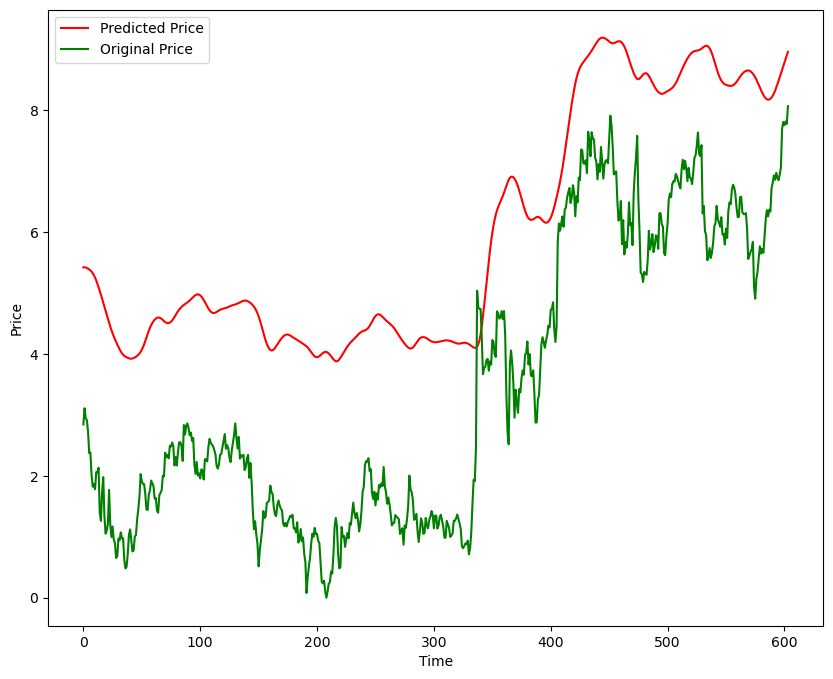

In [56]:
import matplotlib.pyplot as plt

# Ensure y_predict and y are on the same scale
plt.figure(figsize=(10, 8))

plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [57]:
model.save('Stock_Prediction_Model.keras')